In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
from progressbar import progressbar as pbar
from scipy.integrate import quad, dblquad

In [21]:
f = np.vectorize(lambda l,w: np.exp(-(w*4+l/10-2)**2) * (np.exp(-(l*2-1-5*w)**2) + np.exp(-(w+l-3.5)**2)))
nZ = dblquad(f, 0,1, lambda k: 0, lambda k: 5)[0]
p_lw = np.vectorize(lambda l,w: np.exp(-(w*4+l/10-2)**2) * (np.exp(-(l*2-1-5*w)**2) + np.exp(-(w+l-3.5)**2)) / nZ)

p_l = np.vectorize(lambda l: quad(lambda w: p_lw(l,w), 0,1)[0])
p_w = np.vectorize(lambda w: quad(lambda l: p_lw(l,w), 0,5)[0])

lr = np.linspace(0,5,200)
wr = np.linspace(0,1,200)
L,W = np.meshgrid(lr,wr)
Z = p_lw(L,W)

dblquad(p_lw, 0,1, lambda k: 0, lambda k: 5)[0]

0.9999999999999998

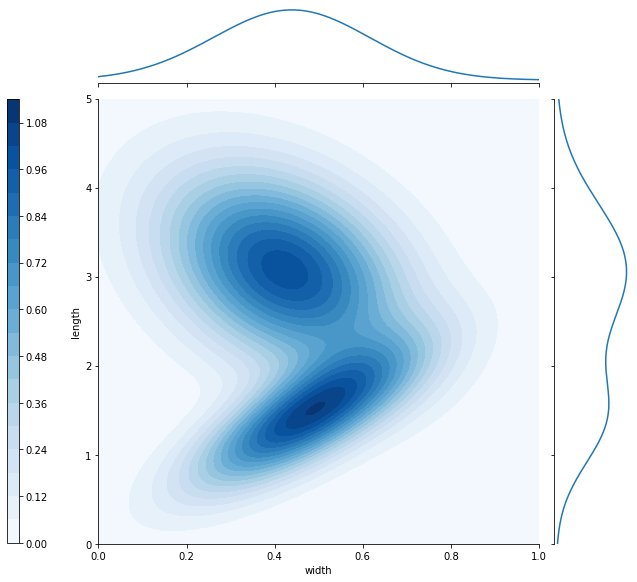

In [63]:
# definitions for the axes
g = sns.JointGrid(height=8)
cp = g.ax_joint.contourf(W, L, Z, levels=20, cmap=plt.cm.Blues)
g.ax_marg_x.plot(wr, Z.sum(axis=1))
g.ax_marg_y.plot(Z.sum(axis=0), lr)
g.ax_joint.set_xlabel("width")
g.ax_joint.set_ylabel("length")
cbar_ax = g.fig.add_axes([-.1, .05, .02, .77])
plt.colorbar(cp, cax=cbar_ax)

In [87]:
@np.vectorize
def p_l_given_w(l,w):
    nZ = quad(lambda l: p_lw(l,w), 0,5)[0]
    return p_lw(l,w)/nZ

@np.vectorize
def p_w_given_l(l,w):
    nZ = quad(lambda w: p_lw(l,w), 0,1)[0]
    return p_lw(l,w)/nZ

In [88]:
quad(lambda l: p_l_given_w(l,0.3), 0, 5)

(1.0, 9.29538908410292e-12)

In [90]:
quad(lambda w: p_w_given_l(2.1,w), 0, 1)

(1.0, 5.828281910910671e-11)